# Regresión Lineal

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


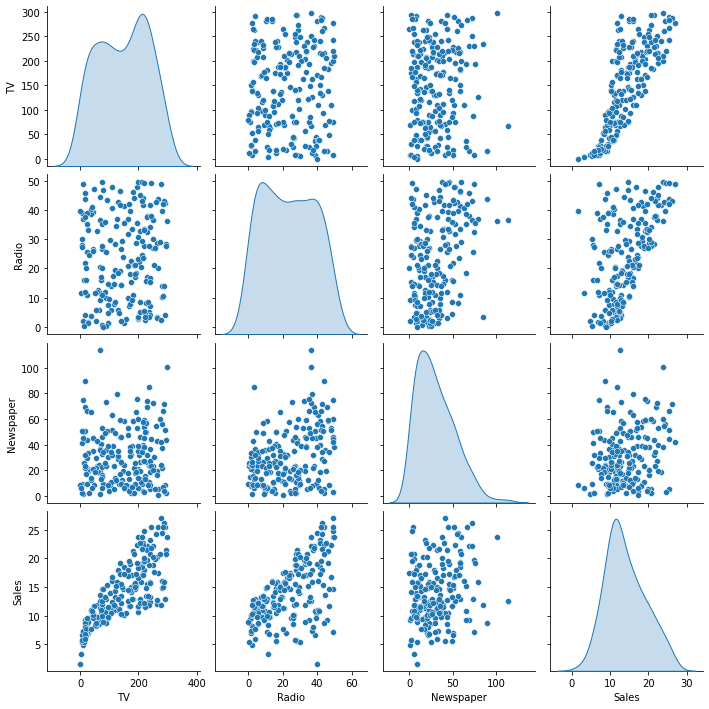

In [ ]:
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Variables Descriptivas (Input)

- **TV:** Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** Advertising dollars spent on Radio
- **Newspaper:** Advertising dollars spent on Newspaper

Variable Respuesta (Output)

- **Sales:** sales of a single product in a given market (in thousands of widgets)

# Ajuste lineal

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales! 

In [ ]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


Realizar predicción

In [ ]:
# Nuevo Dato
X_new = pd.DataFrame({'TV': [60]})
X_new.head()
# predecir para un nuevo valor
lm.predict(X_new)

array([9.88479198])

In [ ]:
print(lm.intercept_ + lm.coef_*60)

[9.88479198]


Plot ajuste

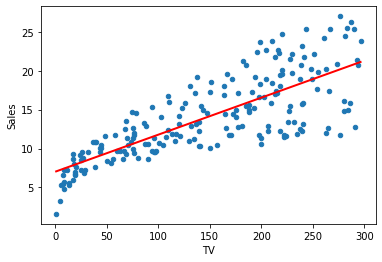

In [ ]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

# Realizar predicciones
preds = lm.predict(X_new)
preds

# Plot dato observado
data.plot(kind='scatter', x='TV', y='Sales')

# Plot ajuste
plt.plot(X_new, preds, c='red', linewidth=2)

Confianza del Modelo

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
# p-values del modelo
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
# R-squared del modelo
lm.rsquared

0.611875050850071

In [ ]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        14:47:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
2.9389/ 0.312

9.419551282051282

##Ejercicio Regresión Lineal

In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra 
import numpy as np

In [ ]:
# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')
df.head() # Cogemos las primeras 5 filas

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Hemos creado el primer objeto **df**, que es una matriz con datos. Esta matriz contiene los datos y contiene: 

1. **Clase**: plantilla genérica (molde o reglas) de cómo es ese objeto. 
2. **Atributos**: son los diferentes características que puede tener un objeto. Para nuestro caso será, el **tamaño**, el nombre de las columnas. *Van sin paréntesis*
3. **Métodos**: Son las acciones que podremos utilizar sobre nuestros objetos. Calcular medias, sumas, conteos, etc. *Van con paréntesis*





In [ ]:
# Ejemplo dinámico de Google Colab
df.shape

(3333, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Manipulación del dataset
Tenemos creado el objeto df en memoria y podemos crear diferentes 

In [ ]:
df.describe() # Descriptivo de todas las variables numéricas

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Devuelve 1 columna
df["State"].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

In [ ]:
# Devuelve las primeras dos observaciones
df[0:2]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [ ]:
print(df.shape)
print(df.columns)

(3333, 20)
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')



**Creación de columnas**, para empezar a modelar

In [ ]:
df['Churn_num'] = df['Churn'].astype('int64')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


**Eliminar** una variable

In [ ]:
df = df.drop(columns="Churn")
df.head()
# df.drop("Churn", axis=1, inplace=True). 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Cambiar nombre** a una variable

In [ ]:
df.rename(columns={"Churn_num": "Churn"}, inplace=True)
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


**Cálculo** sobre una columna

In [ ]:
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True)

0    2850
1     483
Name: Churn, dtype: int64


0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [ ]:
df['Churn'].mean()

0.14491449144914492

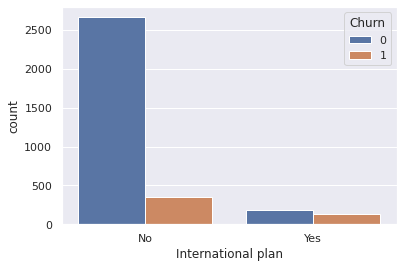

In [ ]:
sns.set()
sns.countplot(x='International plan', hue='Churn', data=df);

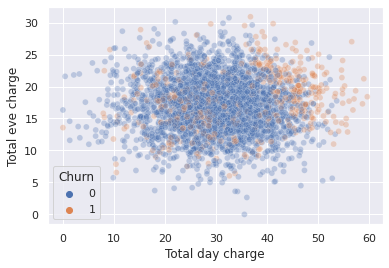

In [ ]:
sns.scatterplot(x='Total day charge', y='Total eve charge', hue='Churn', alpha =0.3, data=df)

## Ejercicio:
- Problema de predicción de número de minutos consumidos `Variable`

1. Ajustar modelo lineal
2. Interpretrar los coeficientes y escribir la ecuación de ajuste
3. Realizar una predicción 
4. Summary del modelo
5. Es un buen modelo?
6. Representación gráfica: scatterplot 


In [ ]:
# Preparación del dato
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df = df[['Total day minutes','Total day calls', 'Total eve calls', 'Total night calls','Total intl calls', 'Number vmail messages' ]]
df.head()

,Total day minutes,Total day calls,Total eve calls,Total night calls,Total intl calls,Number vmail messages
0,265.1,110,99,91,3,25
1,161.6,123,103,103,3,26
2,243.4,114,110,104,5,0
3,299.4,71,88,89,7,0
4,166.7,113,122,121,3,0


In [ ]:
# 1. Ajustar modelo lineal, predecir total day minutes, con las otras variables
# crear X e Y

X = df[['....']]
y = df[['...']]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = (...)  
lm.  (...)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 2. Interpretrar los coeficientes y escribir la ecuación de ajuste
print(lm.intercept_)
print(lm.coef_)

[166.43742836]
[[0.01919164 0.04214507 0.06397608 0.17075695 0.00264521]]


In [ ]:
print(lm.intercept_ + lm.coef_[0][0]*100 + lm.coef_[0][1]*100 + lm.coef_[0][2]*100 + lm.coef_[0][3]*100 + lm.coef_[0][4]*100 )


[196.30892408]


In [ ]:
# 3. Realizar una predicción para un individuo que tiene:
## 'Total day calls',       20
## 'Total eve calls',       30
## 'Total night calls',     15
## 'Total intl calls',      10
## 'Number vmail messages'  100
X_new = #(...)
X_new.head()
# use the model to make predictions on a new value
lm.#pred

array([[171.01734547]])

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Total_day_minutes,Total_day_calls,Total_eve_calls,Total_night_calls,Total_intl_calls,Number_vmail_messages
0,265.1,110,99,91,3,25
1,161.6,123,103,103,3,26
2,243.4,114,110,104,5,0
3,299.4,71,88,89,7,0
4,166.7,113,122,121,3,0


In [ ]:
# 4. Summary del modelo
# lm = smf.ols(formula='Total_day_minutes ~ Total_day_calls + Total_eve_calls + Total_night_calls', data=df).fit()

#lm = smf.ols(...)

lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total_day_minutes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5870
Date:                Mon, 06 Sep 2021   Prob (F-statistic):              0.710
Time:                        19:34:56   Log-Likelihood:                -18051.
No. Observations:                3333   AIC:                         3.611e+04
Df Residuals:                    3327   BIC:                         3.615e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               166.4374      8.498     19.586      0.000     149.776     183.099
Total_day_calls           0.0192      0.047      0.408      0.683      -0.073       0.111
Total_eve_calls           0.0421      0.047      0.889      0.374      -0.051       0.135
Total_night_calls         0.0640      0.048      1.326      0.185      -0.031       0.159
Total_intl_calls          0.1708      0.384      0.445      0.656      -0.581       0.923
Number_vmail_messages     0.0026      0.069      0.038      0.969      -0.133       0.138
==============================================================================
Omnibus:                        0.554   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.585
Skew:                          -0.030   Prob(JB):                        0.746
Kurtosis:                       2.974   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 5. Es un buen modelo? 

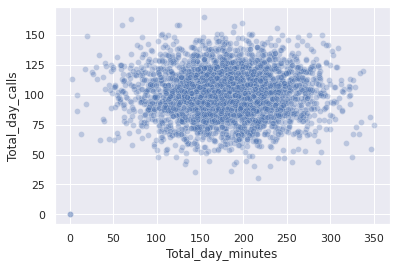

In [ ]:
# 6. Representación gráfica


### Podrías responder a las siguientes preguntas?
1. Cual es el input y cual es el output
2. A que se corresponde una observación?
3. Que variables descriptivas utilizamos?
4. Como se obtienen los datos del output?
5. Clasificación o regresión?
6. Volumen de datos aproximado?
7. Beneficio del uso?

In [ ]:
### FUTURAS SOLUCIONES


## Ejemplo ajuste lineal que funciona:

#### Coronavirus: ¿podría haber 100 veces más contagiados de los reportados?

https://medium.com/@carlosbort/coronavirus-podría-haber-hasta-100-veces-más-contagiados-de-los-reportados-7f54cbcdeec

#### Coronavirus: algoritmos para dimensionar los recursos sanitarios. Estamos a tiempo.

https://medium.com/@carlosbort/coronavirus-algoritmos-para-dimensionar-los-recursos-sanitarios-estamos-a-tiempo-98e4df7f59b8